In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Read the CSV files into DataFrames
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_tags_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_tags_2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_tags_3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_tags_4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_tags_5.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_tags_6.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_tags_7.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_tags_8.csv')
df9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_tags_9.csv')
df10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_tags_10.csv')

# Concatenate the DataFrames and drop duplicates
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]).drop_duplicates().reset_index(drop=True)
df = pd.DataFrame(df)

# Display the union DataFrame
print(df)

                                               comments  star_rating  \
0     Never noticed him goad or insult anyone. Very ...          3.5   
1     extremely boring projects, not very knowlegeab...          2.5   
2     Loved this professor, easy and right to the po...          3.7   
3                                                mmmmmm          4.1   
4     fairly cool teacher, but really into ecology. ...          4.3   
...                                                 ...          ...   
4787  He\'s a great teacher with a dad type sense of...          3.9   
4788  Funny guy, he really knows his stuff. If you r...          3.6   
4789  The man is a total flake and a****to boot. Gra...          3.7   
4790  He is very nice and wants to help if you go to...          3.3   
4791  Mrs. Jackson is a character and she expects yo...          3.5   

                                                   tags  
0     kind, ultra-liberal, helpful, informative, fri...  
1     boring, not k

In [94]:
df.columns

Index(['comments', 'star_rating', 'tags'], dtype='object')

In [95]:
df.head()

,comments,star_rating,tags
0,Never noticed him goad or insult anyone. Very ...,3.5,"kind, ultra-liberal, helpful, informative, fri..."
1,"extremely boring projects, not very knowlegeab...",2.5,"boring, not knowledgeable, minimal feedback, t..."
2,"Loved this professor, easy and right to the po...",3.7,"Loved, easy, right to the point, always there"
3,mmmmmm,4.1,NaN
4,"fairly cool teacher, but really into ecology. ...",4.3,"cool, into ecology, mindless busywork, best, e..."


In [96]:
df.isnull().sum()

comments         0
star_rating      0
tags           280
dtype: int64

In [97]:
df = df.dropna() # drop all rows with null values
df.isnull().sum()

comments       0
star_rating    0
tags           0
dtype: int64

In [98]:
pip install nltk

In [99]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [100]:
# Assuming 'comments' is your DataFrame column containing text
results = df['tags'].apply(lambda x: sia.polarity_scores(x))
df['compound'] = results.apply(lambda x: x['compound'])

# Classify sentiments based on the compound score
df['sentiment_category'] = df['compound'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

In [101]:
df.head()

,comments,star_rating,tags,compound,sentiment_category
0,Never noticed him goad or insult anyone. Very ...,3.5,"kind, ultra-liberal, helpful, informative, fri...",0.8555,positive
1,"extremely boring projects, not very knowlegeab...",2.5,"boring, not knowledgeable, minimal feedback, t...",-0.4215,negative
2,"Loved this professor, easy and right to the po...",3.7,"Loved, easy, right to the point, always there",0.7783,positive
4,"fairly cool teacher, but really into ecology. ...",4.3,"cool, into ecology, mindless busywork, best, e...",0.7506,positive
5,Coach respects everyone\'s opinion. He encoura...,4.3,"respectful, encouraging, caring",0.8625,positive


In [102]:
# prompt: convert df to csv and save.

df.to_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_sentiment.csv', index=False)

sentiment_category
negative    3.060322
neutral     3.494064
positive    3.876528
Name: star_rating, dtype: float64


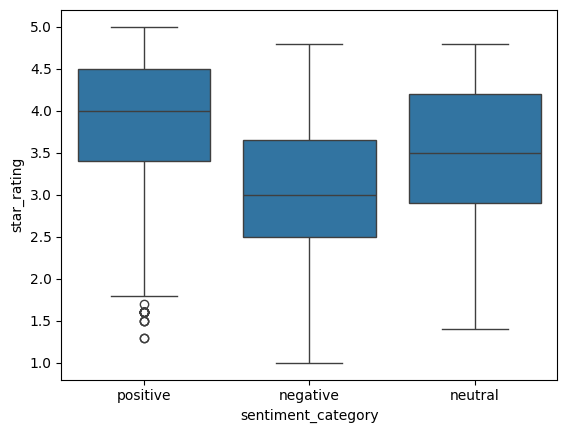

In [103]:
import matplotlib.pyplot as plt
# Group by sentiment category and calculate average star rating
average_ratings = df.groupby('sentiment_category')['star_rating'].mean()
print(average_ratings)

# Visualize the relationship (optional)
sns.boxplot(x='sentiment_category', y='star_rating', data=df)
plt.show()

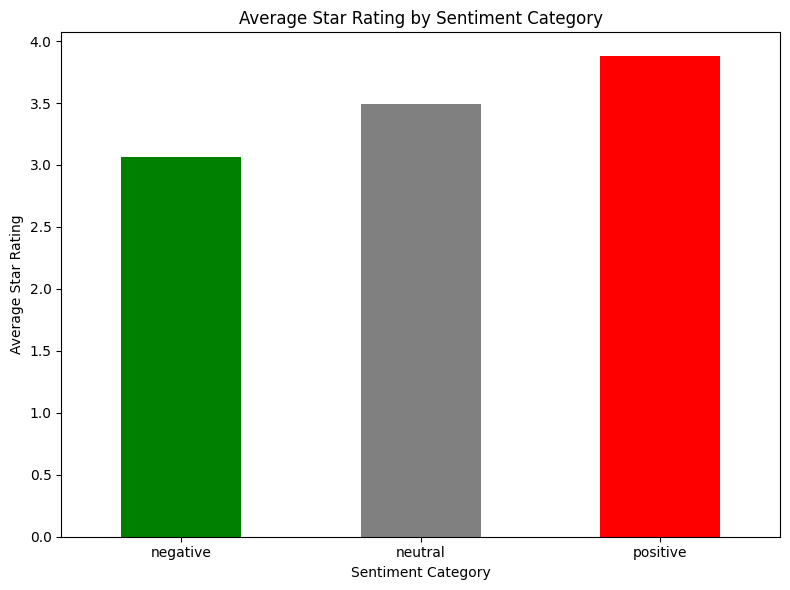

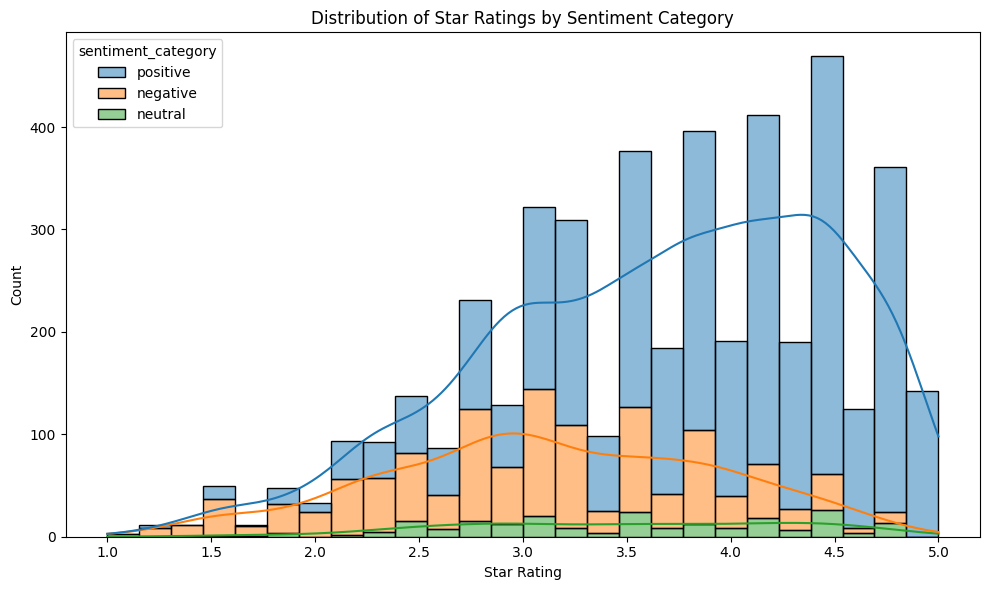

In [104]:
import matplotlib.pyplot as plt
# Bar plot for average star ratings by sentiment category
plt.figure(figsize=(8, 6))
average_ratings.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Average Star Rating by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Distribution of star ratings for each sentiment category
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='star_rating', hue='sentiment_category', multiple='stack', kde=True)
plt.title('Distribution of Star Ratings by Sentiment Category')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [105]:
# List of professor names
professor_names = [
    "Leslie Looney", "Jans Wager", "Robert Warden", "Bryan Eldredge", "William Hollinrake",
    "Pat Ledbetter", "Juanita Campos", "Ann Lewald", "Hon Linda", "Ruben Mouhiddan",
    "Margaret Mitchell", "Diane Reid", "John Cunningham", "Wolfgang Ziller", "Clark",
    "Sally Mallory", "Deirdre O'Shea", "Robin Hochstrasser", "Rich Carter", "Mara Merlino",
    "Michael Scarlatos", "Tina Keeble", "Eleanor Branch", "Virgina Rivers", "Mulloy Robertson",
    "Dana Baylard", "Mima Petrovic", "Joan Krone", "Nancy Jones", "Jim Pletcher",
    "Anita Hampton", "Panos Alexakos", "Jeffrey Kent", "Bill Sanders", "Angelica Vessella"
]


def assign_professors_randomly_with_bias(df, professor_names):
    # Initial weights, these can be adjusted based on your preference for each professor's frequency
    weights = np.array([10, 5, 20, 5, 10] + [1]*30)  # Assume first five professors are more frequent

    # Normalize weights to sum to 1
    weights = weights / weights.sum()

    # Randomly adjust weights to add more randomness, e.g., multiply by a random number
    random_factors = np.random.rand(len(weights)) + 0.5  # Random factor between 0.5 and 1.5
    adjusted_weights = weights * random_factors
    adjusted_weights /= adjusted_weights.sum()  # Re-normalize

    # Assign professors based on the adjusted weights
    df['professor_name'] = np.random.choice(professor_names, size=len(df), p=adjusted_weights)

# Example usage
assign_professors_randomly_with_bias(df, professor_names)

In [106]:
df

,comments,star_rating,tags,compound,sentiment_category,professor_name
0,Never noticed him goad or insult anyone. Very ...,3.5,"kind, ultra-liberal, helpful, informative, fri...",0.8555,positive,Robert Warden
1,"extremely boring projects, not very knowlegeab...",2.5,"boring, not knowledgeable, minimal feedback, t...",-0.4215,negative,William Hollinrake
2,"Loved this professor, easy and right to the po...",3.7,"Loved, easy, right to the point, always there",0.7783,positive,Joan Krone
4,"fairly cool teacher, but really into ecology. ...",4.3,"cool, into ecology, mindless busywork, best, e...",0.7506,positive,Robert Warden
5,Coach respects everyone\'s opinion. He encoura...,4.3,"respectful, encouraging, caring",0.8625,positive,William Hollinrake
...,...,...,...,...,...,...
4787,He\'s a great teacher with a dad type sense of...,3.9,"great teacher, dad sense of humor, young, skip...",0.8658,positive,Jans Wager
4788,"Funny guy, he really knows his stuff. If you r...",3.6,"Funny, knowledgeable, helpful, laid back",0.6908,positive,Robert Warden
4789,The man is a total flake and a****to boot. Gra...,3.7,"flake, a****, knowledgeable",0.0000,neutral,Robert Warden
4790,He is very nice and wants to help if you go to...,3.3,"friendly, helpful, knowledgeable",0.7184,positive,Leslie Looney


In [107]:
professor_counts = df['professor_name'].value_counts()
print(professor_counts)

professor_name
Robert Warden         1164
William Hollinrake     731
Leslie Looney          417
Jans Wager             401
Bryan Eldredge         147
Juanita Campos          88
Dana Baylard            88
Panos Alexakos          85
Robin Hochstrasser      82
Clark                   81
Sally Mallory           77
Mima Petrovic           75
Mara Merlino            69
Hon Linda               69
Eleanor Branch          68
Pat Ledbetter           66
Virgina Rivers          59
Mulloy Robertson        57
Jeffrey Kent            56
Bill Sanders            55
Ruben Mouhiddan         54
Deirdre O'Shea          52
Wolfgang Ziller         51
Rich Carter             49
Tina Keeble             47
Margaret Mitchell       42
Jim Pletcher            38
Michael Scarlatos       37
Diane Reid              36
Ann Lewald              32
Nancy Jones             31
Joan Krone              31
John Cunningham         27
Anita Hampton           26
Angelica Vessella       24
Name: count, dtype: int64


In [108]:
# prompt: in df I need to remove values showing 'NA' in tags

df = df[df['tags'] != 'NA']
df.head()

,comments,star_rating,tags,compound,sentiment_category,professor_name
0,Never noticed him goad or insult anyone. Very ...,3.5,"kind, ultra-liberal, helpful, informative, fri...",0.8555,positive,Robert Warden
1,"extremely boring projects, not very knowlegeab...",2.5,"boring, not knowledgeable, minimal feedback, t...",-0.4215,negative,William Hollinrake
2,"Loved this professor, easy and right to the po...",3.7,"Loved, easy, right to the point, always there",0.7783,positive,Joan Krone
4,"fairly cool teacher, but really into ecology. ...",4.3,"cool, into ecology, mindless busywork, best, e...",0.7506,positive,Robert Warden
5,Coach respects everyone\'s opinion. He encoura...,4.3,"respectful, encouraging, caring",0.8625,positive,William Hollinrake


In [109]:
!pip install transformers

In [110]:
# prompt: convert df to csv and save.

df.to_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_sentiment_and_professors.csv', index=False)

In [111]:
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the pre-trained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

# Function to convert tags to embeddings using Word2Vec
def get_tag_embeddings_w2v(tags):
    embeddings = []
    for tag in tags:
        if tag in word2vec_model:
            embeddings.append(word2vec_model[tag])
        else:
            embeddings.append(np.zeros(300))  # Use a zero vector for unknown words
    return np.array(embeddings)

# Function to calculate cosine similarity
def calculate_similarity_w2v(embeddings):
    # Compute the mean embedding
    mean_embedding = np.mean(embeddings, axis=0)
    # Calculate cosine similarity between each tag embedding and the mean embedding
    similarities = cosine_similarity(embeddings, mean_embedding.reshape(1, -1))
    return similarities.flatten()

# Process the tags and rank them by importance using Word2Vec
def rank_tags_by_importance_w2v(tags):
    tags_list = [tag.strip().lower() for tag in tags.split(',')]
    embeddings = get_tag_embeddings_w2v(tags_list)
    similarities = calculate_similarity_w2v(embeddings)
    ranked_tags = [tag for _, tag in sorted(zip(similarities, tags_list), reverse=True)]
    return ', '.join(ranked_tags[:5])

# Apply the processing to the tags column
df['ranked_tags_w2v'] = df['tags'].apply(rank_tags_by_importance_w2v)

# Display the processed tags
df[['professor_name', 'tags', 'ranked_tags_w2v']].head()

[==================================================] 100.0% 1662.8/1662.8MB downloaded


,professor_name,tags,ranked_tags_w2v
0,Robert Warden,"kind, ultra-liberal, helpful, informative, fri...","helpful, informative, friendly, kind, ultra-li..."
1,William Hollinrake,"boring, not knowledgeable, minimal feedback, t...","boring, traditional, tough grader, not knowled..."
2,Joan Krone,"Loved, easy, right to the point, always there","loved, easy, right to the point, always there"
4,Robert Warden,"cool, into ecology, mindless busywork, best, e...","easiest, best, cool, mindless busywork, into e..."
5,William Hollinrake,"respectful, encouraging, caring","respectful, caring, encouraging"


In [112]:
df[['professor_name', 'tags', 'ranked_tags_w2v', 'star_rating', 'sentiment_category']]

,professor_name,tags,ranked_tags_w2v,star_rating,sentiment_category
0,Robert Warden,"kind, ultra-liberal, helpful, informative, fri...","helpful, informative, friendly, kind, ultra-li...",3.5,positive
1,William Hollinrake,"boring, not knowledgeable, minimal feedback, t...","boring, traditional, tough grader, not knowled...",2.5,negative
2,Joan Krone,"Loved, easy, right to the point, always there","loved, easy, right to the point, always there",3.7,positive
4,Robert Warden,"cool, into ecology, mindless busywork, best, e...","easiest, best, cool, mindless busywork, into e...",4.3,positive
5,William Hollinrake,"respectful, encouraging, caring","respectful, caring, encouraging",4.3,positive
...,...,...,...,...,...
4787,Jans Wager,"great teacher, dad sense of humor, young, skip...","interesting, young, skips around, quick to gui...",3.9,positive
4788,Robert Warden,"Funny, knowledgeable, helpful, laid back","helpful, knowledgeable, funny, laid back",3.6,positive
4789,Robert Warden,"flake, a****, knowledgeable","knowledgeable, flake, a****",3.7,neutral
4790,Leslie Looney,"friendly, helpful, knowledgeable","knowledgeable, helpful, friendly",3.3,positive


In [113]:
df

,comments,star_rating,tags,compound,sentiment_category,professor_name,ranked_tags_w2v
0,Never noticed him goad or insult anyone. Very ...,3.5,"kind, ultra-liberal, helpful, informative, fri...",0.8555,positive,Robert Warden,"helpful, informative, friendly, kind, ultra-li..."
1,"extremely boring projects, not very knowlegeab...",2.5,"boring, not knowledgeable, minimal feedback, t...",-0.4215,negative,William Hollinrake,"boring, traditional, tough grader, not knowled..."
2,"Loved this professor, easy and right to the po...",3.7,"Loved, easy, right to the point, always there",0.7783,positive,Joan Krone,"loved, easy, right to the point, always there"
4,"fairly cool teacher, but really into ecology. ...",4.3,"cool, into ecology, mindless busywork, best, e...",0.7506,positive,Robert Warden,"easiest, best, cool, mindless busywork, into e..."
5,Coach respects everyone\'s opinion. He encoura...,4.3,"respectful, encouraging, caring",0.8625,positive,William Hollinrake,"respectful, caring, encouraging"
...,...,...,...,...,...,...,...
4787,He\'s a great teacher with a dad type sense of...,3.9,"great teacher, dad sense of humor, young, skip...",0.8658,positive,Jans Wager,"interesting, young, skips around, quick to gui..."
4788,"Funny guy, he really knows his stuff. If you r...",3.6,"Funny, knowledgeable, helpful, laid back",0.6908,positive,Robert Warden,"helpful, knowledgeable, funny, laid back"
4789,The man is a total flake and a****to boot. Gra...,3.7,"flake, a****, knowledgeable",0.0000,neutral,Robert Warden,"knowledgeable, flake, a****"
4790,He is very nice and wants to help if you go to...,3.3,"friendly, helpful, knowledgeable",0.7184,positive,Leslie Looney,"knowledgeable, helpful, friendly"


In [114]:
# Separate the ranked tags into individual columns
def split_ranked_tags(tags):
    tags_list = tags.split(', ')
    # Ensure there are exactly 5 tags, pad with empty strings if necessary
    tags_list += [''] * (5 - len(tags_list))
    return tags_list[:5]

# Apply the function to create separate columns for each tag
ranked_tags_df = df['ranked_tags_w2v'].apply(split_ranked_tags).apply(pd.Series)
ranked_tags_df.columns = ['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']

# Concatenate the new columns with the original dataframe
result_df = pd.concat([df, ranked_tags_df], axis=1)

# Display the resulting dataframe with the new columns
result_df[['professor_name', 'tags', 'ranked_tags_w2v', 'Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].head()

,professor_name,tags,ranked_tags_w2v,Tag1,Tag2,Tag3,Tag4,Tag5
0,Robert Warden,"kind, ultra-liberal, helpful, informative, fri...","helpful, informative, friendly, kind, ultra-li...",helpful,informative,friendly,kind,ultra-liberal
1,William Hollinrake,"boring, not knowledgeable, minimal feedback, t...","boring, traditional, tough grader, not knowled...",boring,traditional,tough grader,not knowledgeable,minimal feedback
2,Joan Krone,"Loved, easy, right to the point, always there","loved, easy, right to the point, always there",loved,easy,right to the point,always there,
4,Robert Warden,"cool, into ecology, mindless busywork, best, e...","easiest, best, cool, mindless busywork, into e...",easiest,best,cool,mindless busywork,into ecology
5,William Hollinrake,"respectful, encouraging, caring","respectful, caring, encouraging",respectful,caring,encouraging,,


In [118]:
result_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/RateMyProfessors/processed_professor_reviews_with_tags_separated.csv', index=False)